# Import Packages

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
# from node import node
from copy import deepcopy
from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, pairwise_logrank_test, multivariate_logrank_test
from scipy.cluster import hierarchy

/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


# Read Globle Data

In [2]:
S_A = pd.read_csv('EM/Input/S_A.csv', index_col=0, header=0)
S_D = pd.read_csv('EM/Input/S_D.csv', index_col=0, header=0)
A_Df10 = pd.read_csv('EM/Input/A_Df/A_Df10.csv', index_col=0, header=0)
A_D = pd.read_csv('EM/Input/A_Do.csv', index_col=0, header=0)

In [5]:
S_Dc = pd.read_csv("Pre_TCGAinfo/Input/PanCancer13tts.DEGmatrix.4TCI.csv", header=0, index_col=0)

# Extract Structure

## HNSC

In [2]:
# HNSC
# HNSC TCI MUT
S_Ai = pd.read_csv("chunhui/Output/HNSC/S_Ai_clu.csv", header=0, index_col=0)
S_Ai.index = [ele[0:12] for ele in S_Ai.index]
S_Ai_f = ['TCGA-CV-5430','TCGA-CQ-5327', 'TCGA-CN-6010']

S_Mi = pd.read_csv("chunhui/Input/HNSC/TCGA/S_Mi.csv", header=0, index_col=0)
S_Mi.index = [ele[0:12] for ele in S_Mi.index]

# add empty row and column
add_l = [idx for idx in S_Ai.index if idx not in S_Mi.index]
for ele in add_l:
    S_Mi.loc[ele,:] = 0
add_l = [idx for idx in S_Ai.columns if idx not in S_Mi.columns]
for ele in add_l:
    S_Mi.loc[:,ele] = 0

S_At = pd.read_csv("chunhui/Output/HNSC/S_A_clu.csv", header=0, index_col=0)
S_At_f = ["TCGA-WA-A7GZ", "TCGA-WA-A7GZ", "TCGA-WA-A7GZ"]

S_Mt = pd.read_csv("chunhui/Input/HNSC/TCGA/HNSC_mc3_gene_level.txt" ,sep='\t', index_col=0).T
S_Mt.index = [ele[0:12] for ele in S_Mt.index]
S_Mt = S_Mt.loc[S_Mt.index & S_At.index, S_Mt.columns & S_At.columns]

S_Mt = pd.read_csv("chunhui/Input/HNSC/TCGA/HNSC_mc3_gene_level.txt" ,sep='\t', index_col=0).T
S_Mt.index = [ele[0:12] for ele in S_Mt.index]
S_Mt = S_Mt.loc[S_Mt.index & S_At.index, S_Mt.columns & S_At.columns]

# add empty row and column
add_l = [idx for idx in S_At.columns if idx not in S_Mt.columns]
for ele in add_l:
    S_Mt.loc[:,ele] = 0

add_l = [idx for idx in S_At.index if idx not in S_Mt.index]
for ele in add_l:
    S_Mt.loc[ele,:] = 0

# HNSC TCI PRO
S_Pci = pd.read_csv("chunhui/Output/HNSC/S_Pci_clu.csv", header=0, index_col=0)
S_Pci.index = [ele[0:12] for ele in S_Pci.index]
S_Pci_f = ["TCGA-CR-7370", "TCGA-CV-5441", "TCGA-CV-A45O"]  # ct PRO

# HNSC TCI DEG
S_Dci = pd.read_csv("chunhui/Output/HNSC/S_Dci_clu.csv", header=0, index_col=0)
S_Dci.index = [ele[0:12] for ele in S_Dci.index]
S_Dci_f = ["TCGA-CV-7253","TCGA-P3-A6T3", "TCGA-TN-A7HJ"] # ct DEG

# All DEG
S_Dct = pd.read_csv("chunhui/Output/HNSC/S_Dct_clu.csv", header=0, index_col=0)
S_Dct.index = [ele[0:12] for ele in S_Dct.index]
S_Dct_f = ["TCGA-F7-7848", "TCGA-CV-7180", "TCGA-F7-A623"]

In [3]:
# Survival Data
sur_df = pd.read_table("chunhui/Input/HNSC/HNSC_survival.txt", sep="\t", index_col=1)
par = "OS"
sur_dfs = sur_df[["%s.time" % par, par]].dropna(axis=0, how="any")

In [125]:
# Paper
subtype = pd.read_csv("PORT/7.2.csv", index_col=0, header=0)
subtype.index = [ele.replace(".", "-") for ele in subtype.index]

## LUAD

In [71]:
# LUAD TCI MUT
S_Ai = pd.read_csv("chunhui/Output/LUAD/S_Ai_clu.csv", header=0, index_col=0)
S_Ai.index = [ele[0:12] for ele in S_Ai.index]
S_Ai_f = ["TCGA-J2-A4AG", "TCGA-69-7760", "TCGA-44-6148" ]

# LUAD TCI DEG
S_Di = pd.read_csv("chunhui/Output/LUAD/S_Di_clu.csv", header=0, index_col=0)
S_Di.index = [ele[0:12] for ele in S_Di.index]
S_Di_f = ["TCGA-35-5375", "TCGA-44-7661", "TCGA-55-7815"] # disc DEG

S_Dci = pd.read_csv("chunhui/Output/LUAD/S_Dci_clu.csv", header=0, index_col=0)
S_Dci.index = [ele[0:12] for ele in S_Dci.index]
S_Dci_f = ["TCGA-49-4486", "TCGA-MP-A4T6", "TCGA-55-7995"]  # ct DEG

# All DEG
# S_Dai = pd.read_csv("chunhui/Output/LUAD/S_Dai_clu.csv", header=0, index_col=0)
# S_Dai.index = [ele[0:12] for ele in S_Dai.index]
# S_Dai_f = ["TCGA-QK-A6V9", "TCGA-CN-5358", "TCGA-CV-7248"]

# S_Dcai = pd.read_csv("chunhui/Output/LUAD/S_Dcai_clu.csv", header=0, index_col=0)
# S_Dcai.index = [ele[0:12] for ele in S_Dcai.index]
# S_Dcai_f = ["TCGA-CV-A6JT", "TCGA-KUA6-H8", "TCGA-CN-A6V3"]

# LUAD TCI PRO
S_Pi = pd.read_csv("chunhui/Output/LUAD/S_Pi_clu.csv", header=0, index_col=0)
S_Pi.index = [ele[0:12] for ele in S_Pi.index]
S_Pi_f = ["TCGA-91-6828", "TCGA-50-5933", "TCGA-55-7815"] # disc PRO

S_Pci = pd.read_csv("chunhui/Output/LUAD/S_Pci_clu.csv", header=0, index_col=0)
S_Pci.index = [ele[0:12] for ele in S_Pci.index]
S_Pci_f = ["TCGA-86-8359", "TCGA-73-7499", "TCGA-55-7994"]  # ct PRO

In [21]:
# Survival Data
sur_df = pd.read_table("chunhui/Input/LUAD/LUAD_survival.txt", sep="\t", index_col=1)
par = "OS"
sur_dfs = sur_df[["%s.time" % par, par]].dropna(axis=0, how="any")

In [11]:
np.sum(sur_df["PFI"])

232

## BRCA

In [53]:
BRCA_sub = pd.read_csv("chunhui/Input/BRCA/Subtype_BRCA.csv", index_col=0, header=0)
sb_l = [0, "Basal", "Her2", "LumA", "LumB", "Normal"]

# BRCA PRO
S_Pi = pd.read_csv("chunhui/Output/BRCA/S_Ps_BRCA_ct.csv", index_col=0, header=0).loc[BRCA_sub.index]
S_Pi_f = ["TCGA-AQ-A04J", "TCGA-AC-A62X", "TCGA-A2-A1FX", "TCGA-A8-A07L"] 

# # BRCA DEG
# S_Dci = S_Dc.loc[BRCA_sub.index, A_D.columns & S_Dc.columns]
# S_Dci_f = ["TCGA-A7-A3J0", "TCGA-A2-A0CO", "TCGA-AC-A3W7", "TCGA-D8-A1XL"] 

# Survival Data
sur_df = pd.read_table("chunhui/Input/BRCA/BRCA_survival.txt", sep="\t", index_col=1)
par = "OS"
sur_dfs = sur_df[["%s.time" % par, par]].dropna(axis=0, how="any")

# Suboverlapping

In [97]:
df = S_Dci
fen_l = S_Dci_f
idx_l = list(df.index)
id_l = [idx_l.index(ele) for ele in fen_l]
id_l.insert(0, 0)
id_l.insert(len(id_l), df.shape[0])
deg_l = [idx_l[id_l[i]: id_l[i+1]] for i in range(len(id_l)-1)]

# Find overlap between samples
df = S_Pci
fen_l = S_Pci_f
idx_l = list(df.index)
id_l = [idx_l.index(ele) for ele in fen_l]
id_l.insert(0, 0)
id_l.insert(len(id_l), df.shape[0])
print(id_l)
sga_l = [idx_l[id_l[i]: id_l[i+1]] for i in range(len(id_l)-1)]

ovl_l = [[len(set(sga) & set(deg)) for sga in sga_l] for deg in deg_l]
pd.DataFrame(ovl_l)

[0, 120, 192, 324, 488]


,0,1,2,3
0,22,59,6,4
1,66,12,5,34
2,19,0,101,36
3,13,1,20,90


# Plot Sur

[0, 110, 224, 474, 494]


/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before ind

[0, 120, 195, 325, 488]


/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before ind

[0, 91, 208, 364, 488]


/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before ind

[0, 168, 300, 432, 488]


/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before ind

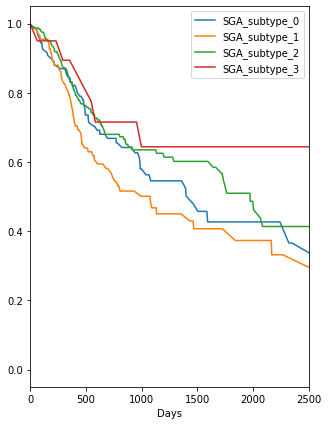

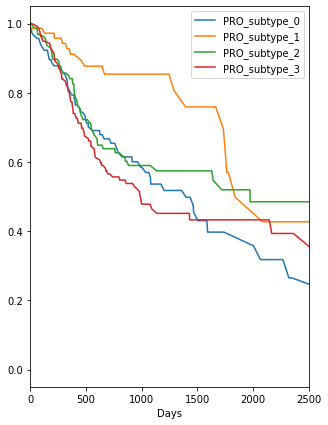

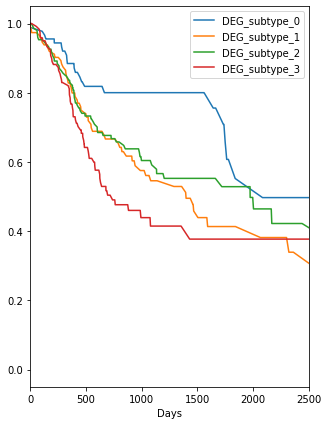

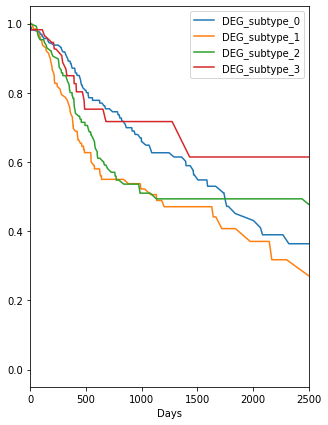

In [22]:
lis = {"S_Ai": [S_Ai, "SGA"], "S_Pci": [S_Pci, "PRO"],  "S_Dci":[S_Dci, "DEG"], "S_Dct":[S_Dct, "DEG"]}

for ele in lis.keys():
    
    df = lis[ele][0]
    fen_l = locals()[ele + "_f"]
    dfs = sur_dfs

    # # hierarchy
    # fig = plt.figure()
    # ax1 = fig.add_subplot(111) 

    # g = sns.clustermap(df, cmap="vlag", center=0)
    # Z = g.dendrogram_row.linkage
    # # Z = hierarchy.linkage(df)

    # hierarchy.set_link_color_palette(['blue', 'red', 'yellow', 'green', 'pink'])
    # dn1 = hierarchy.dendrogram(Z, ax=ax1, color_threshold=2.5, orientation='top')

    # hierarchy.set_link_color_palette(None)  # reset to default after use
    # plt.show()

    idx_l = list(df.index)
    id_l = [idx_l.index(ele) for ele in fen_l]
    id_l.insert(0, 0)
    id_l.insert(len(id_l), df.shape[0])
    print(id_l)

    # Surivival Plot
    fig = plt.figure(figsize=(5,7))
    ax1 = fig.add_subplot(111) 

    km = KaplanMeierFitter()
    
    s_l = []
    t_l = []
    g_l = []
    e_l = []
    # manually
    for i in range(len(id_l)-1):
        ele_ls = idx_l[id_l[i]: id_l[i+1]]
    # hierarchy
    # for ele in ['blue', 'red', 'yellow', 'green', 'pink']:
    #     ele_l = [dn1['leaves'][i] for i in range(len(dn1['color_list'])) if dn1['color_list'][i]==ele]
    #     ele_ls = df.index[ele_l]

        df_m = dfs.loc[set(ele_ls) & set(dfs.index)]
        df_m = df_m.drop_duplicates(subset=None, keep='first', inplace=False)

        i = str(i)
        locals()["T_" + i] = df_m['%s.time' % par] #/ 365
        locals()["E_" + i] = df_m[par]
        s_l.extend(df_m.index)
        t_l.extend(locals()["T_" + i])
        g_l.extend(["%s_subtype_%s" % (lis[ele][1], i)]*locals()["T_" + i].shape[0])
        e_l.extend(locals()["E_" + i])
        km.fit(locals()["T_" + i], event_observed=locals()["E_" + i], label="%s_subtype_%s" % (lis[ele][1], i))
        km.survival_function_.plot(ax=ax1)

    ax1.set_xlabel("Days")
    ax1.set_xlim([0,2500])
    
    lr = pairwise_logrank_test(t_l, g_l, e_l)

    test = pd.DataFrame([t_l, g_l, e_l ], index=["Days", "Groups", "Events"], columns=s_l).T
    
#     print(test.shape)
    test.to_csv("chunhui/Output/HNSC/%s_HNSC_Sur.csv" % ele, index=True, header=True)
    plt.savefig("HNSC_plot/%s_subtype.png" % ele, dpi=600)